# Fetching & Loading Data

In [65]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [66]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [67]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [68]:
iris_df = iris_df.rename(columns={"sepal length (cm)": "sepal_length", 
                        "sepal width (cm)": "sepal_width", 
                        "petal length (cm)": "petal_length",
                       "petal width (cm)": "petal_width"})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [69]:
iris_df["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [70]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


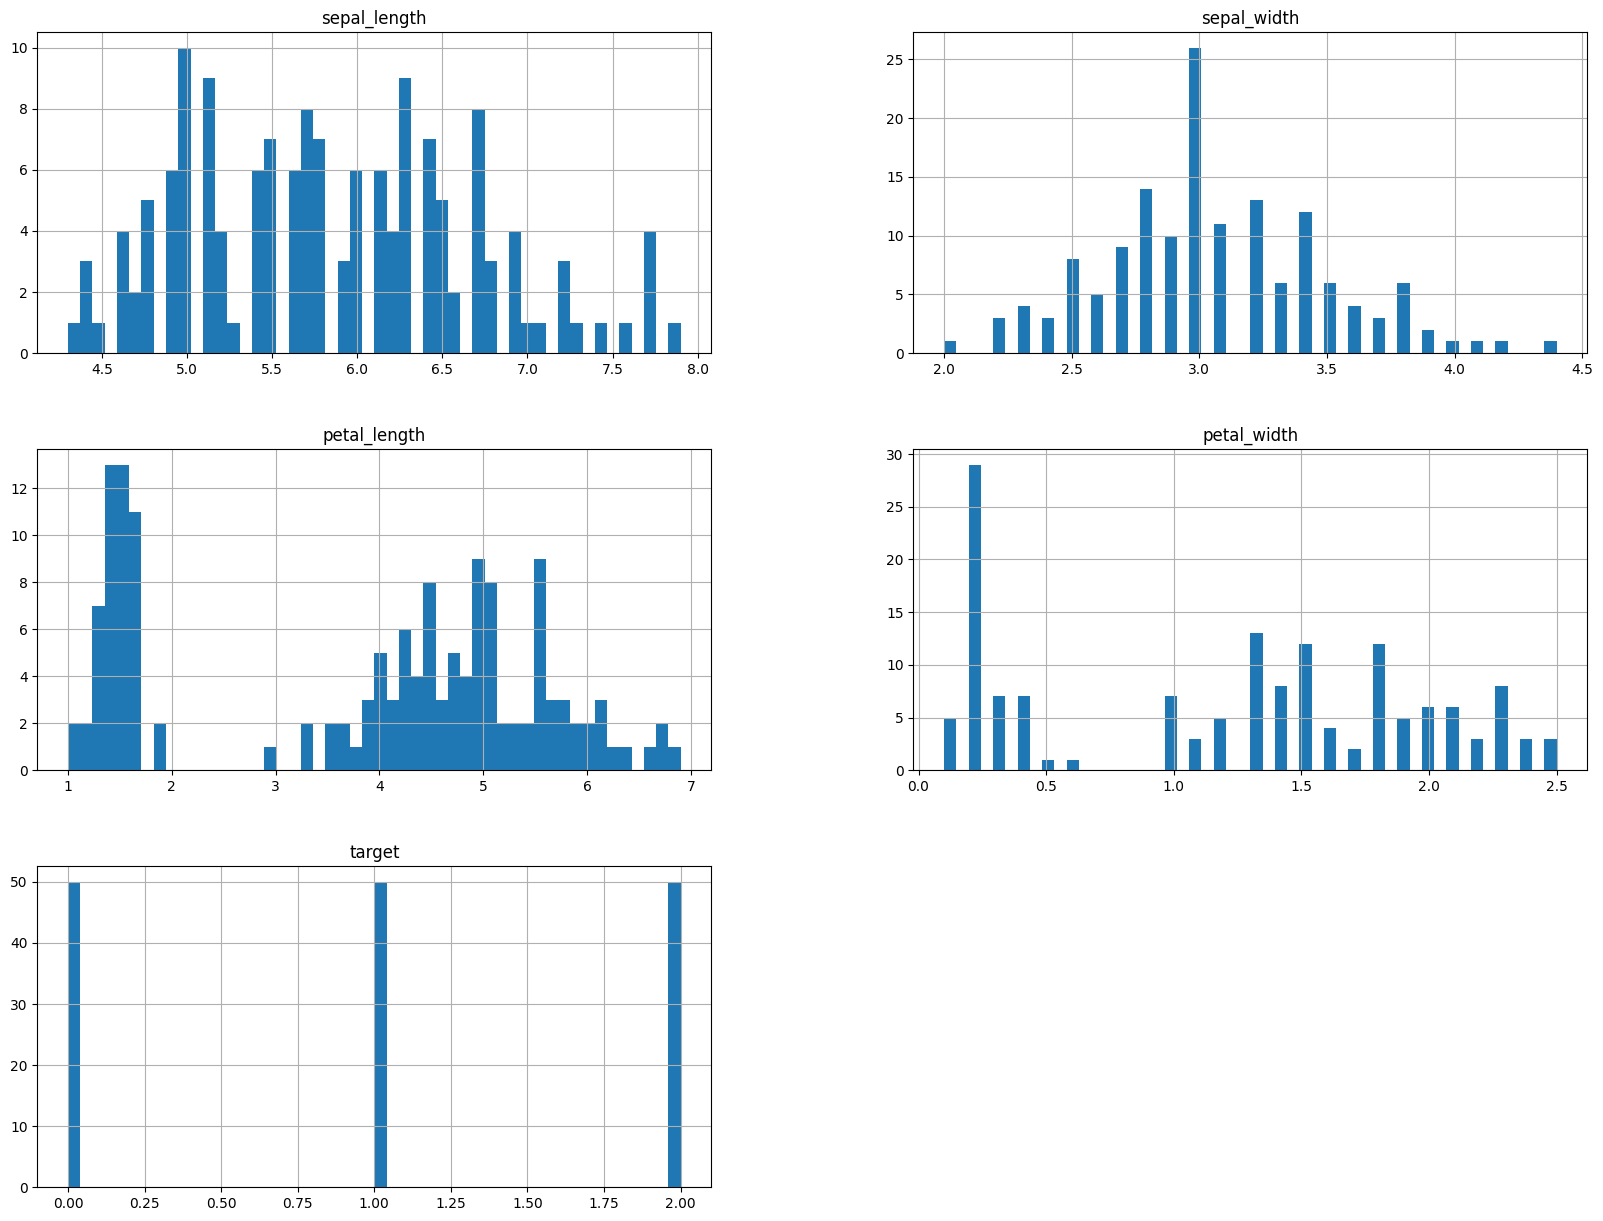

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
iris_df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

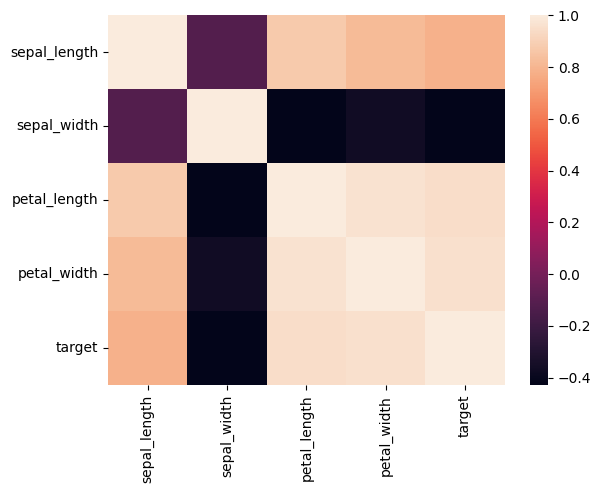

In [72]:
import seaborn as sns
# represent feature correlation matrix using a heatmap
corr = iris_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [73]:
corr["target"].sort_values(ascending=False)

target          1.000000
petal_width     0.956547
petal_length    0.949035
sepal_length    0.782561
sepal_width    -0.426658
Name: target, dtype: float64

# Perceptron

In [235]:
def generate_data_for_perceptron(cols_to_select):
    y = iris_df.iloc[0:100, 4].values
    y = np.where(y == 0, -1, 1)
    X = iris_df.iloc[0:100][cols_to_select].values
    X = np.concatenate((np.ones((100,1), dtype=int,),X),axis=1) #add 1 for the bias
    return X, y

def generate_testing_data_for_perceptron(cols_to_select):
    y_test = iris_df.iloc[100:, 4].values
    y_test = np.where(y_test == 0, -1, 1)
    X_test = iris_df.iloc[100:][cols_to_select].values
    X_test = np.concatenate((np.ones((50,1), dtype=int,),X_test),axis=1) #add 1 for the bias
    return X_test, y_test

In [236]:
X, y = generate_data_for_perceptron(['sepal_length', 'petal_length'])
X_test, y_test = generate_testing_data_for_perceptron(['sepal_length', 'petal_length'])

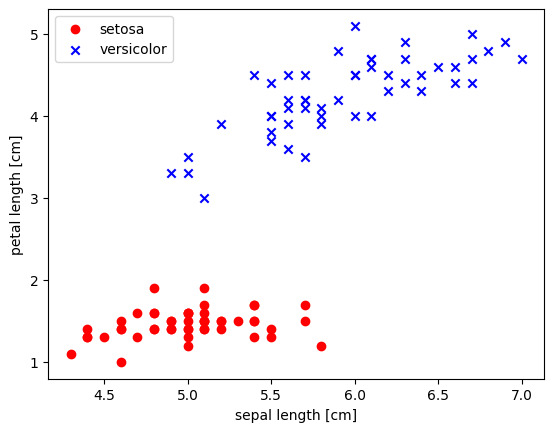

In [237]:
plt.scatter(X[0:50,1], X[0:50, 2], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 1], X[50:100, 2], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Question 1 : Perceptron Weight Update Rule

Fill out the weights update rule for perceptrion algorithm, try to not look at the code snippet in the slides.

In [238]:
rgen= np.random.RandomState(42)
w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
errors_ = []
# learning rate
eta = 0.1
def fit(X, y):
    for _ in range(10):
        errors = 0
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))# TODO :: expect one line of code 
            w_[1:] += update * xi # TODO :: expect one line of code 
            w_[0] += update # TODO :: expect one line of code
            errors += int(update != 0.0)
            errors_.append(errors)
    return w_, errors_
    
def net_input(X):
    return np.dot(X, w_[1:]) + w_[0] 

def predict(X):
    return np.where(net_input(X) >= 0.0, 1, -1)

In [239]:
w_, errors_ = fit(X, y)

In [242]:
print(f'sum of squared errors: {np.sum(predict(X_test) - y_test)**2}')

sum of squared errors: 0


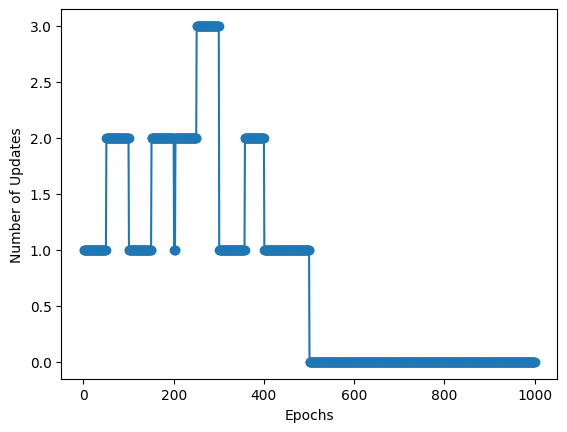

In [243]:
plt.plot(range(1, len(errors_) + 1), errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

In [244]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap= ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 1].min() -1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() -1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    ones = np.ones((1,71675), dtype=int)
    if classifier != None:
        arr = np.array([xx1.ravel(), xx2.ravel()]).T
        arr = np.concatenate((np.ones((arr.shape[0],1), dtype=int), arr), axis=1)
        Z = classifier.predict(arr)
    else:
        Z = predict(np.array([np.ones((1,71675), dtype=int),xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 1], 
                    y=X[y == cl, 2],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z = predict(np.array([np.ones((1,71675), dtype=int),xx1.ravel(), xx2.ravel()]).T)
/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


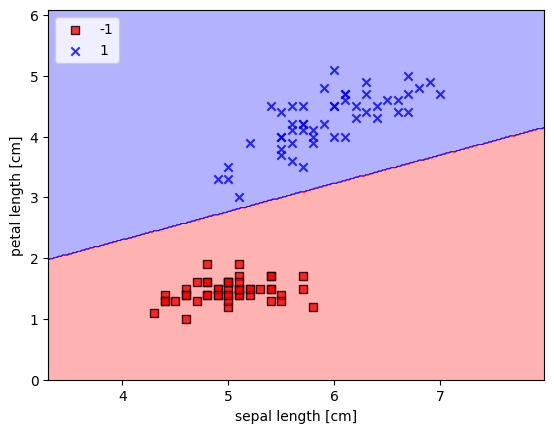

In [245]:
# plot the classification result
plot_decision_regions(X, y)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaline

In [246]:
rgen= np.random.RandomState(42)
w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
cost_ = []
n_iter = 100
eta = 0.01

In [247]:
def shuffle(X, y):
    """Shuffle training data"""
    r = rgen.permutation(len(y))
    return X[r], y[r]

In [248]:
def net_input(X):
    """Calculate net input"""
    return np.dot(X, w_) 

## Question 2 : Adaline Weight Update Rule

Fill out the weights update rule for Adaline algorithm, try to not look at the code snippet in the slides.

In [249]:
def update_weights(xi, target, w_):
    """Apply Adalinelearning rule to update the weights"""
    output = net_input(xi) # TODO :: expect one line of code 
    error = (target - output)# TODO :: expect one line of code
    w_ += eta * xi.dot(error) # TODO :: expect one line of code
    cost = (error**2)/2 # TODO :: expect one line of code
    return cost

In [250]:
def activation(X):
    """Compute linear activation"""
    return X

In [251]:
def predict(X):
    """Return class label after unit step"""
    return np.where(activation(net_input(X)) >= 0.0, 1, -1)

In [252]:
def fit(X, y,w_):
    for i in range(n_iter):
        if shuffle:
            X, y = shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(update_weights(xi, target,w_))
                avg_cost= sum(cost) / len(y)
                cost_.append(avg_cost)

In [253]:
fit(X,y,w_)

In [254]:
print(f'sum of squared errors: {np.sum(predict(X_test) - y_test)**2}')


sum of squared errors: 0


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z = predict(np.array([np.ones((1,71675), dtype=int),xx1.ravel(), xx2.ravel()]).T)
/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


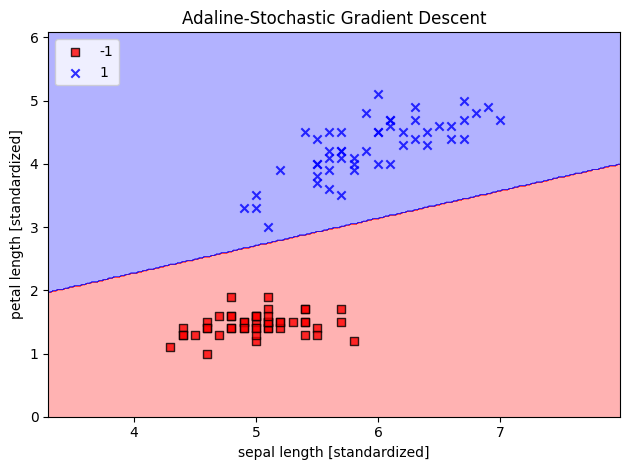

Text(0.5, 0, 'Epochs')

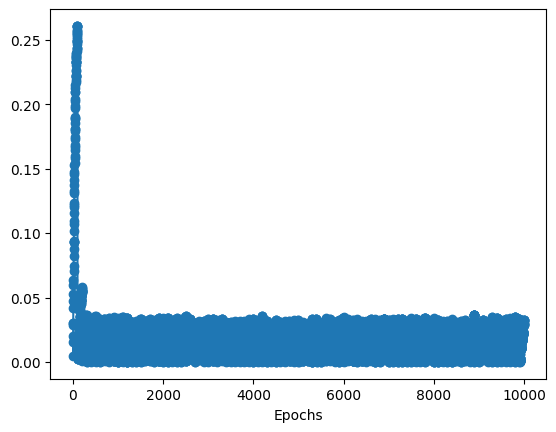

In [256]:
plot_decision_regions(X, y)
plt.title('Adaline-Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(cost_) + 1), cost_, marker='o')
plt.xlabel('Epochs')

# Logistic Regression

## Question 3 : Implement Logistic Regression 

In this exercise, you need to implement a Logistic Regression model by using sklearn LogisticRegression class, look at sklearn document for LogisticRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and fill out the following code cell. 

In [257]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='auto') # TODO :: expect 1 line of code

lr.fit(X, y)

LogisticRegression(C=100, random_state=1)

In [259]:
print(f'sum of squared errors: {np.sum(lr.predict(X_test) - y_test)**2}')

sum of squared errors: 0


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


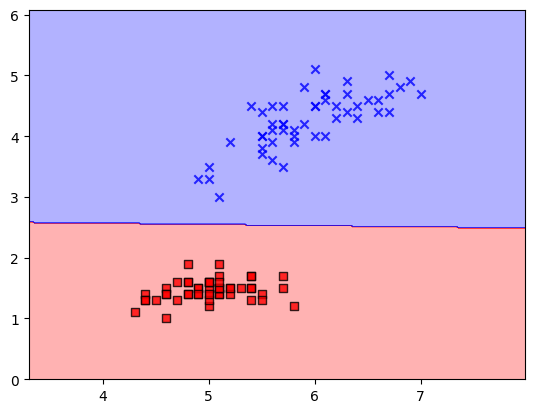

In [260]:
plot_decision_regions(X, y, lr)

sum of squared errors: 0


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


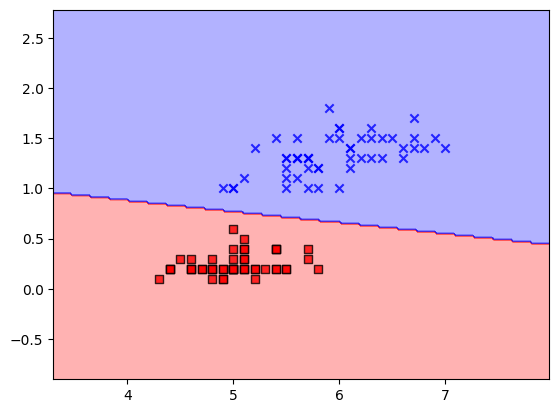

In [261]:
# remove petal length and use petal width
X_1 = np.column_stack((X, iris_df['petal_width'][:100].values))
X_1 = np.delete(X_1, 2, axis=1)
lr.fit(X_1, y)
X1_test, y1_test = generate_testing_data_for_perceptron(['sepal_length', 'petal_width'])
print(f'sum of squared errors: {np.sum(lr.predict(X1_test) - y1_test)**2}')
plot_decision_regions(X_1, y, lr)

sum of squared errors: 0


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


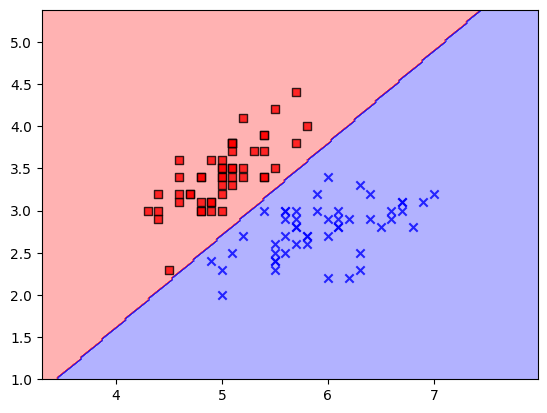

In [262]:
# remove petal width and use sepal_width
X_2 = np.column_stack((X, iris_df['sepal_width'][:100].values))
X_2 = np.delete(X_2, 2, axis=1)
lr.fit(X_2, y)
X2_test, y2_test = generate_testing_data_for_perceptron(['sepal_length', 'sepal_width'])
print(f'sum of squared errors: {np.sum(lr.predict(X2_test) - y2_test)**2}')
plot_decision_regions(X_2, y, lr)

sum of squared errors: 0


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


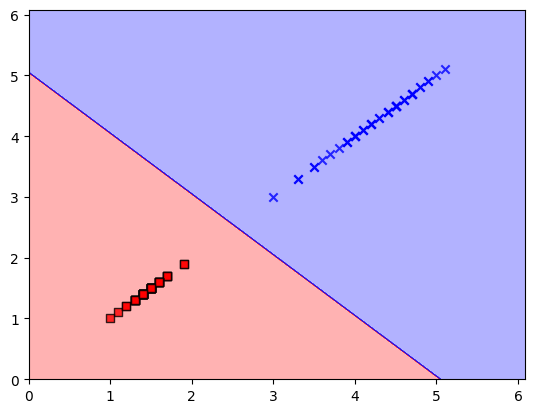

In [263]:
# remove sepal length and use sepal_width and petal length
X_3 = np.column_stack((X, iris_df[['sepal_width', 'petal_length']][:100].values))
X_3 = np.delete(X_3, 1, axis=1)
X_3 = np.delete(X_3, 2, axis=1)
lr.fit(X_3, y)
X3_test, y3_test = generate_testing_data_for_perceptron(['sepal_width', 'petal_length'])
print(f'sum of squared errors: {np.sum(lr.predict(X3_test) - y3_test)**2}')
plot_decision_regions(X_3, y, lr)

sum of squared errors: 0


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


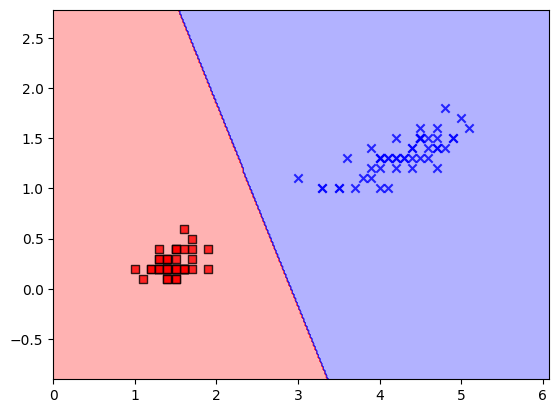

In [264]:
# use sepal_width and petal width
X_4 = np.column_stack((X, iris_df[['sepal_width', 'petal_width']][:100].values))
X_4 = np.delete(X_4, 1, axis=1)
X_4 = np.delete(X_4, 2, axis=1)
lr.fit(X_4, y)
X4_test, y4_test = generate_testing_data_for_perceptron(['sepal_width', 'petal_width'])
print(f'sum of squared errors: {np.sum(lr.predict(X4_test) - y4_test)**2}')
plot_decision_regions(X_4, y, lr)

sum of squared errors: 0


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


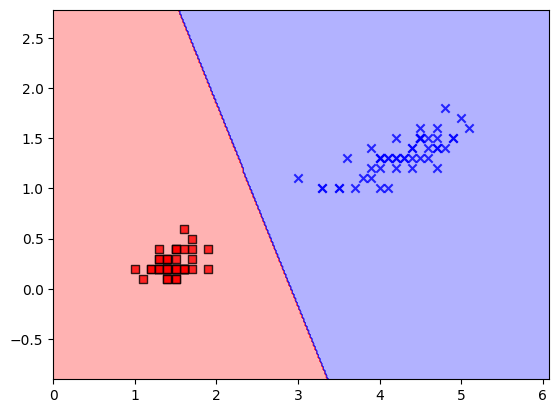

In [265]:
#  use petal length and petal width
X_5 = np.column_stack((X, iris_df[['petal_length', 'petal_width']][:100].values))
X_5 = np.delete(X_5, 1, axis=1)
X_5 = np.delete(X_5, 2, axis=1)
lr.fit(X_5, y)
X5_test, y5_test = generate_testing_data_for_perceptron(['petal_length', 'petal_width'])
print(f'sum of squared errors: {np.sum(lr.predict(X5_test) - y5_test)**2}')
plot_decision_regions(X_5, y, lr)

3.b: When using petal length and sepal width, the resulting chart was very much the same as petal length and petal width. I believe that our original choices of sepal length and petal length are the better choices for this model. The other choices were either very linear, too close the decision line, or correlated more with other features. The Sepal Length and Petal length did not correlate largely with one another. 

## Question 3 : Play with Regularization Strength

Parameter C in LogisticRegression is used to control the regularization strength, it's a critical way to control overfitting,  try out differnt values (1, 10, 100) for C and plot the corresponding decision region, what observation do you make by comparing different decision regions? what value of C do you think is the best?


/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


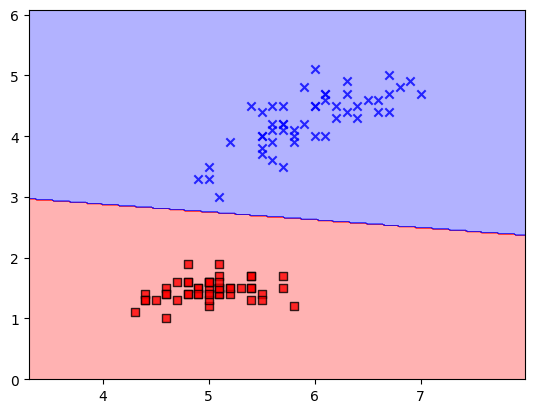

In [156]:
# comparing values of C: 1
lr = LogisticRegression(C=1, random_state=1, solver='lbfgs', multi_class='auto') # TODO :: expect 1 line of code

lr.fit(X, y)
plot_decision_regions(X, y, lr)

/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


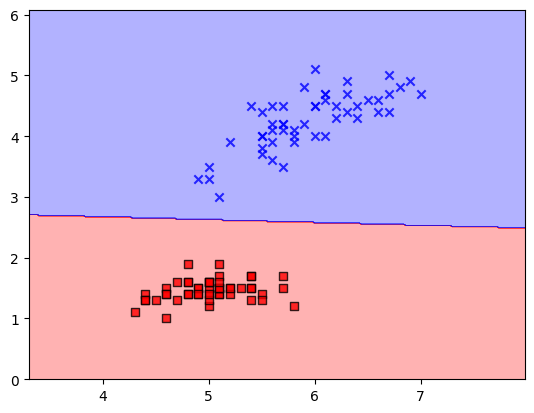

In [157]:
# comparing values of C: 1
lr = LogisticRegression(C=10, random_state=1, solver='lbfgs', multi_class='auto') # TODO :: expect 1 line of code

lr.fit(X, y)
plot_decision_regions(X, y, lr)

/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


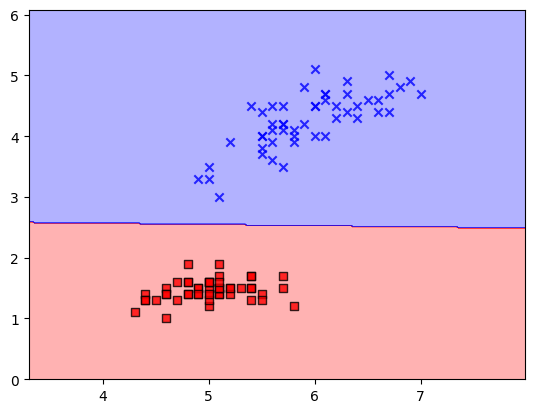

In [158]:
# comparing values of C: 1
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='auto') # TODO :: expect 1 line of code

lr.fit(X, y)
plot_decision_regions(X, y, lr)

/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_8391/1513131458.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 1],


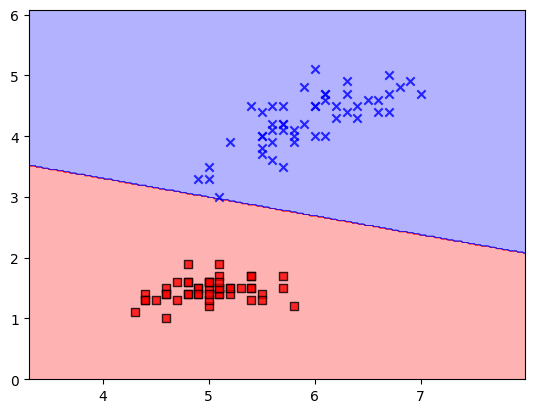

In [159]:
# comparing values of C: 1
lr = LogisticRegression(C=0.01, random_state=1, solver='lbfgs', multi_class='auto') # TODO :: expect 1 line of code

lr.fit(X, y)
plot_decision_regions(X, y, lr)

- The C parameter for logistic regression is used in regularization. It minimizes the loss function the larger the value of C that we input. This is essential when we want to align the predictions more closely with data, however, too large and we can overfit the data. Too small and the data would be underfit.

- I believe the C=10 would be a decent measure to use. We can see more consideration towards values that lean more havily to the bottom left while still considering the other parameter holding more values to the top right.

## Question 4
Compare your results of the Perceptron, Adaline, and Logistic Regression.

### Perceptron
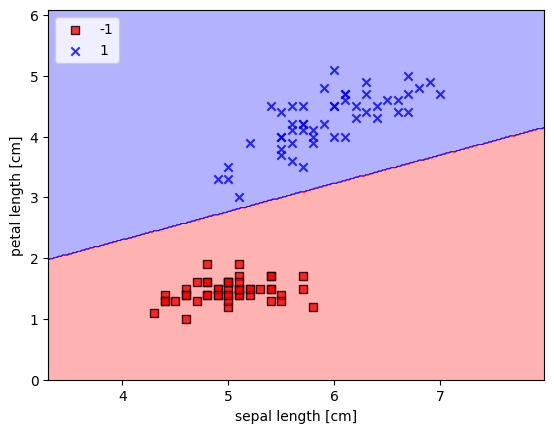
![Perceptron Epochs.png](<attachment:Perceptron Epochs.png>)

### Adaline
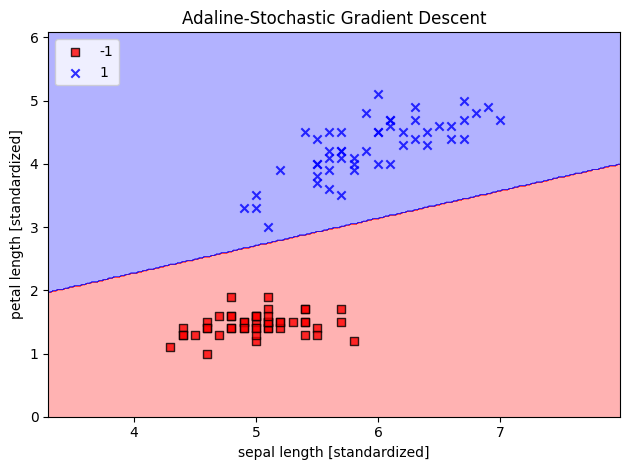
![Adaline Epochs.png](<attachment:Adaline Epochs.png>)

### Logistic Regression
![Logistic Regression.png](<attachment:Logistic Regression.png>)
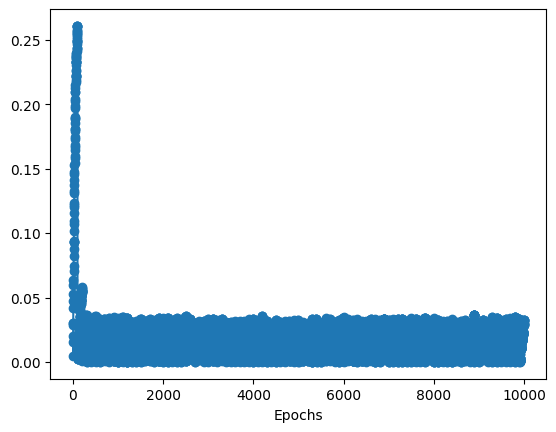
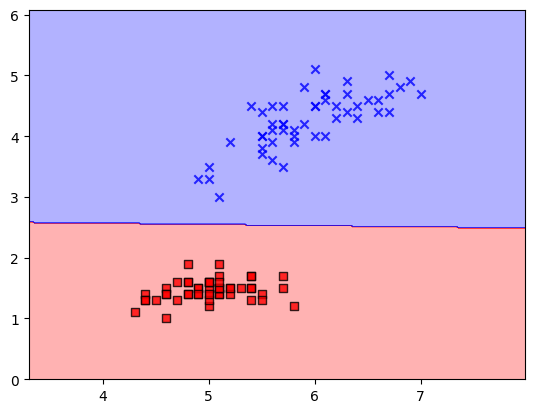
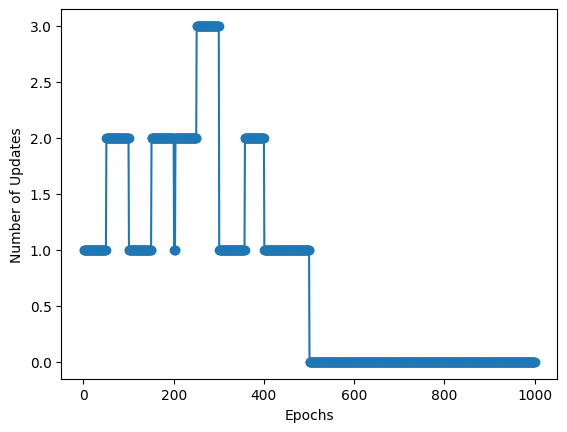

Although our results did not yield any errors when conducting testing on the remaining 50 data points, we can see from the visualizations that the Perceptron and Adaline models have conducted many iterations to reduce errors and still have yielded a decision line that is slightly less accurate than logistic regression.